# Fit Hill equation to data points

##### General settings

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.optimize import minimize

In [3]:
from dcpyps import dcio
from dcpyps import dcplots
import dcpyps.dcfits.dataIO as dataIO
from dcpyps.dcfits.equations import SSR
from dcpyps.dcfits.stats import ObservedInformation
from dcpyps.dcfits.stats import LikelihoodIntervals

### Load and display data points

In [4]:
filename = ("../dcpyps/samples/etc/CVFITExample.xlsx")
allsets = dataIO.read_sets_from_Excel(filename, sheet=0, skip_lines=0, set_cols=2)
print('File {0} loaded'.format(filename))
print('{0:d} sets found.'.format(len(allsets)))

File ../dcpyps/samples/etc/CVFITExample.xlsx loaded
5 sets found.


In [5]:
for i in range(len(allsets)):
        print ('\nSet #{0:d}:'.format(i+1))
        print (allsets[i])


Set #1:

X	Y	s(Y)	weight
30	54	0	1
100	538	0	1
300	2745	0	1
1000	6493	0	1
3000	8450	0	1
3000	9793	0	1
3000	9647	0	1
3000	10023	0	1
3000	9025	0	1
3000	9341	0	1
10000	10349	0	1
10000	10467	0	1
30000	11527	0	1
30000	10946	0	1


Set #2:

X	Y	s(Y)	weight
30	91	0	1
100	645	0	1
300	2460	0	1
600	3592	0	1
1000	4369	0	1
1000	4598	0	1
1000	4752	0	1
1000	4724	0	1
1000	4412	0	1
3000	6430	0	1
10000	7227	0	1
30000	7970	0	1
30000	7976	0	1


Set #3:

X	Y	s(Y)	weight
100	1731	0	1
300	7829	0	1
600	11922	0	1
1000	14397	0	1
3000	16500	0	1
3000	17804	0	1
3000	18528	0	1
3000	18820	0	1
10000	18818	0	1
30000	19593.5	0	1


Set #4:

X	Y	s(Y)	weight
30	305	0	1
100	1856	0	1
300	7834.5	0	1
600	8970	0	1
600	9534	0	1
600	11256	0	1
600	10424	0	1
600	12133	0	1
1000	13201	0	1
3000	16686	0	1
10000	17145	0	1
30000	16329	0	1


Set #5:

X	Y	s(Y)	weight
100	980	0	1
300	3193	0	1
600	4949	0	1
1000	4806	0	1
1000	6183	0	1
1000	6188	0	1
1000	6162	0	1
1000	6355	0	1
1000	6190	0	1
3000	8658	0	1
10000	9165	0	1
10000	9284	0	1
10000	9

Inspect loaded sets

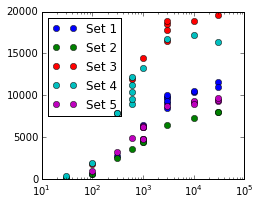

In [6]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121)

for dataset in allsets: 
    if dataset.S.any() == 0:
        ax.plot(dataset.X, dataset.Y, 'o', label=dataset.title)
    else: 
        ax.errorbar(dataset.X, dataset.Y, yerr=dataset.S, fmt='o', label=dataset.title)
ax.set_xscale('log')
ax.legend(loc=2)

### Load Hill equation

In [7]:
eqname = 'Hill'
if eqname == 'Hill' or eqname == 'Langmuir':
    from dcpyps.dcfits.equations import Hill

In [8]:
from dcpyps.dcfits.fitting import SingleFitSession
from dcpyps.dcfits.fitting import MultipleFitSession
fitsessions = MultipleFitSession()
for dataset in allsets:
    fitsessions.add(SingleFitSession(dataset, Hill(eqname))) 


	Fitting session for Set 1 initialised!
	Fitting session for Set 2 initialised!
	Fitting session for Set 3 initialised!
	Fitting session for Set 4 initialised!
	Fitting session for Set 5 initialised!

In [9]:
for fs in fitsessions.allsessions:
    fs.propose_guesses()
gplots = fitsessions.prepare_fplot('guess')

Guesses proposed
Guesses proposed
Guesses proposed
Guesses proposed
Guesses proposed


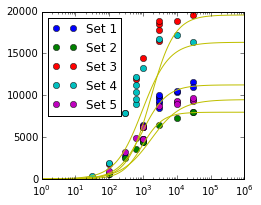

In [10]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121)
for dataset in allsets: 
    if dataset.S.any() == 0:
        ax.plot(dataset.X, dataset.Y, 'o', label=dataset.title)
    else: 
        ax.errorbar(dataset.X, dataset.Y, yerr=dataset.S, fmt='o', label=dataset.title)
for gpl in gplots:
    ax.plot(gpl[0], gpl[1], 'y-')        
ax.set_xscale('log')
ax.legend(loc=2)

### Minimise log-likelihood function.

In [11]:
for fs in fitsessions.allsessions:
    ssr = SSR(fs.eq, fs.data)
    fs.fit(ssr.equation)
    #errs = ObservedInformation(fs.eq.theta, ssr, ssr.to_fit)
print('All fits finished!')
fplots = fitsessions.prepare_fplot('fit')

Single fit finished
Single fit finished
Single fit finished
Single fit finished
Single fit finished
All fits finished!


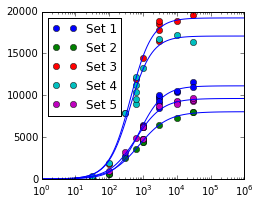

In [12]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121)
for dataset in allsets: 
    if dataset.S.any() == 0:
        ax.plot(dataset.X, dataset.Y, 'o', label=dataset.title)
    else: 
        ax.errorbar(dataset.X, dataset.Y, yerr=dataset.S, fmt='o', label=dataset.title)
for fpl in fplots:
    ax.plot(fpl[0], fpl[1], 'b-')        
ax.set_xscale('log')
ax.legend(loc=2)

Plot histogramm, estimated exponential pdf and individual components.
Print fitted parameter estimates.

### Calculate approximate SD

Approximate standard deviations of estimated values are calculated using the observed information matrix.   The observed information, or observed Fisher information, is the negative of the second derivative (the Hessian matrix) of the "log-likelihood".

In [13]:
for fs in fitsessions.allsessions:
    ssr = SSR(fs.eq, fs.data)
    errs = ObservedInformation(fs.eq.theta, ssr, ssr.to_fit)
    print("errors calculated")

#errs = ObservedInformation(res.x, expPDF, expPDF.loglik)
#errs.print_errs()

TypeError: 'NoneType' object is not subscriptable

### Calculate likelihood intervals

The most likely values of the parameters are those that correspond to maximal log-likelihood, $L_{max}$.  The likelihood intervals for for a particular parameter are estimated by holding that parameter at a fixed value away from $L_{max}$ and repeating the fit with all other parameters free to vary. Log-likelihood value so achieved, $L_{crit}$, is less than $L_{max}$.  $L_{crit}$ is obtained for two values of the parameter, one above and one below its maximum likelihood estimate.  These upper and lower limits are usually asymmetrical to the best fit value. 

In [ ]:
#ll = LikelihoodIntervals(res.x, expPDF, errs.approximateSD)
#print('Likelihood intervals')
#ll.print_intervals()